## Millikan electron experiment (Regression, Newman Computational Physics, Exc 3.8  p.123 )

This is worth 3 points.

The whole source of excitement about the photolectric effect was that it is governed by a very simple equation, whose verification turned out to be very strong evidence that light consists of particles (let's call them photons).


$$
\text{V} = \frac{h}{e} \nu - \Phi
$$

Read this as V (Voltage) = $\frac{h}{e}$ (Planck's Constant divided by the charge of an electron) times
$\nu$ (the frequency of the light) minus $\Phi$ (known as the work function of the surface).
So an electron gets kicked up from the surface by a photon, loses a little energy ($\Phi$)
because it takes some work to pry it loose, and then has energy (V) proportional to the
light's wavelength.

The experimental setup was such that the work function of the surface was constant throughout  the experiment.

Here is Millikan's data, measuring the voltage produced by single photons of light
at various frequencies. He won the Nobel Prize for these results, which confirmed
predictions made in Einstein's 1905 work on the photoelectric effect, for which Einstein also
won the Nobel Prize.


In [15]:
import pandas as pd

github_url ='https://raw.githubusercontent.com/gawron/python-for-social-science/master/'
data_path = 'text_classification/data/'
url_dir = github_url + data_path
data_file = "millikan.txt"

###############################################################################
#
#                    D a t a
#
###############################################################################
e_charge = 1.602e-19
df = pd.read_csv(url_dir + data_file,header=None,delimiter= " ",names=("Frequency","Voltage"))

In [16]:
df

,Frequency,Voltage
0,5.487400e+14,0.53090
1,6.931000e+14,1.08420
2,7.430700e+14,1.27340
3,8.219300e+14,1.65980
4,9.607400e+14,2.19856
5,1.184000e+15,3.10891


1.  The equation says the Frequency and the voltage should be related by a linear relation. Assuming the data do obey this linear relation, use Scikit learn's linear regression implementation to find $\frac{h}{e}$ and $\Phi$ from these data points.  

2.  Then given that the charge of an electron  is $1.602e^{-19}$, estimate Planck's constant. This is one of the most important constants in Physics.  Look it up to see how good your estimate is.  Compute your percentage of error.

3.  Draw a scatter plot of the 6 data points.  Use the results of your linear regression to plot the  line that is the best fit to these points in the same plot.  You will need to make a fairly arbitrary decision about the aspect of the figure (ratio of height to width), since the x and y axis represent different units with very different orders of magnitude.

4.  What is the value of $\Phi$?  Hint:  It's work.  It shouldn't be negative.

Estimated Planck's constant: 6.5493e-34 J·s
Accepted Planck's constant: 6.6260e-34 J·s
Percentage error: 1.16%
Estimated work function (Φ): 1.7312 eV


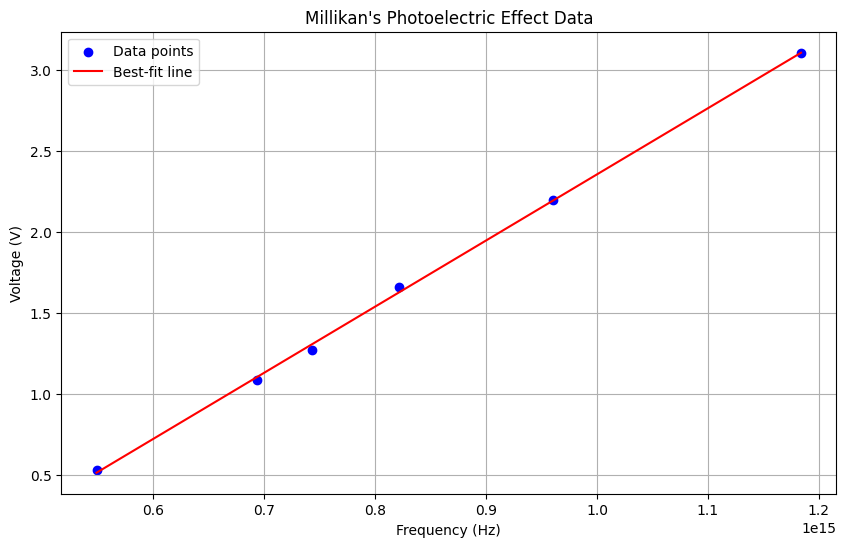

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
github_url = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/'
data_path = 'text_classification/data/'
url_dir = github_url + data_path
data_file = "millikan.txt"
e_charge = 1.602e-19  # Charge of an electron in Coulombs

df = pd.read_csv(url_dir + data_file, header=None, delimiter=" ", names=("Frequency", "Voltage"))

# Prepare data for regression
X = df[["Frequency"]].values  # Frequency in Hz
y = df["Voltage"].values      # Voltage in Volts

# Perform linear regression
model = LinearRegression()
model.fit(X, y)

# Get slope (h/e) and intercept (-Phi)
slope = model.coef_[0]
intercept = model.intercept_

# Calculate Planck's constant (h = slope * e)
h_estimated = slope * e_charge

# Calculate work function (Phi = -intercept)
phi_estimated = -intercept

# Accepted Planck's constant
h_accepted = 6.626e-34

# Calculate percentage error
percentage_error = abs((h_estimated - h_accepted) / h_accepted) * 100

# Print results
print(f"Estimated Planck's constant: {h_estimated:.4e} J·s")
print(f"Accepted Planck's constant: {h_accepted:.4e} J·s")
print(f"Percentage error: {percentage_error:.2f}%")
print(f"Estimated work function (Φ): {phi_estimated:.4f} eV")

# Plot the data and the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Best-fit line')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Voltage (V)')
plt.title('Millikan\'s Photoelectric Effect Data')
plt.legend()
plt.grid()
plt.show()

## 1985 Auto Imports Database  Exercise  (Regression)


This problem is worth 7 points.

UCI Data sets

Schlimmer, J. (1985). Automobile Dataset. UCI Machine Learning Repository. https://doi.org/10.24432/C5B01C.

-- Creator/Donor: Jeffrey C. Schlimmer (Jeffrey.Schlimmer@a.gp.cs.cmu.edu)
-- Date: 19 May 1987
-- Sources:

     1) 1985 Model Import Car and Truck Specifications, 1985 Ward's
        Automotive Yearbook.
     2) Personal Auto Manuals, Insurance Services Office, 160 Water
        Street, New York, NY 10038
     3) Insurance Collision Report, Insurance Institute for Highway
        Safety, Watergate 600, Washington, DC 20037


This exercise involves a technique called **cross-validation**: k-fold cross-validation means
that you do k different train test splits, each time using a different portion of the data for the
test set.  The way this typically works is that by the end of the k splits, each item in the dataset
has had a chance to be in the test set (that's the way the scikit_learn `KFold` function works).
Intuitively this means that if there are items in the data that are particularly hard, the learner will
get a crack at predicting those items without having seen them during training.

Here is how cross validation on a small dataset of size 7 works if we require there to
be 7 splits:

In [3]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6],[7,5]])
y = np.array([1, 2, 1, 2, 1, 2, 2])
rs = KFold(n_splits=7)

for i, (train_index, test_index) in enumerate(rs.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: indices = {train_index}")
    print(f"  Test:  indices = {test_index}")

Fold 0:
  Train: indices = [1 2 3 4 5 6]
  Test:  indices = [0]
Fold 1:
  Train: indices = [0 2 3 4 5 6]
  Test:  indices = [1]
Fold 2:
  Train: indices = [0 1 3 4 5 6]
  Test:  indices = [2]
Fold 3:
  Train: indices = [0 1 2 4 5 6]
  Test:  indices = [3]
Fold 4:
  Train: indices = [0 1 2 3 5 6]
  Test:  indices = [4]
Fold 5:
  Train: indices = [0 1 2 3 4 6]
  Test:  indices = [5]
Fold 6:
  Train: indices = [0 1 2 3 4 5]
  Test:  indices = [6]


**General idea of the assignment: Reproduce the regression result from Kibler et al.**

Kibler, D., Aha, D. W., & Albert, M. (1989).  Instance-based prediction of real-valued attributes.  *Computational Intelligence 5* pp.  51--57.

**Predicted price of car using all Numeric and Boolean attributes.**

Their Method: an instance-based learning (IBL) algorithm derived from a localized k-nearest neighbor algorithm. You won't build the IBL system.  You will just implement the system they  compared it with: a standard  linear regression model. Note that they discarded all instances with missing attribute values.  You should do the same.  This resulted in a training set of 159 instances.

The Idea: Train 159 models. In each case, train with 158 instances.  Predict the price of  the  159th instance and save that in an array called `predictions`.  Each time you train,. a different row of the data should be held out. to be used as test data; scikit learn's KFold should help.


Results:

Percent Average Deviation Error, also known as MAPE ("mean absolute percentage error")  of Prediction from Actual

1. 11.84% for the IBL algorithm
2. 14.12% for the resulting linear regression equation

#### Attribute information

 1. symboling:                -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses:        continuous from 65 to 256.
3. make:                     alfa-romero, audi, bmw, chevrolet, dodge, honda,
                           isuzu, jaguar, mazda, mercedes-benz, mercury,
                           mitsubishi, nissan, peugot, plymouth, porsche,
                           renault, saab, subaru, toyota, volkswagen, volvo
4. fuel-type:                diesel, gas.
5. aspiration:               std, turbo.
6. num-of-doors:             four, two.
7. body-style:               hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels:             4wd, fwd, rwd.
9. engine-location:          front, rear.
10. wheel-base:               continuous from 86.6 120.9.
11. length:                   continuous from 141.1 to 208.1.
12. width:                    continuous from 60.3 to 72.3.
13. height:                   continuous from 47.8 to 59.8.
14. curb-weight:              continuous from 1488 to 4066.
15. engine-type:              dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders:         eight, five, four, six, three, twelve, two.
17. engine-size:              continuous from 61 to 326.
18. fuel-system:              1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore:                     continuous from 2.54 to 3.94.
20. stroke:                   continuous from 2.07 to 4.17.
21. compression-ratio:        continuous from 7 to 23.
22. horsepower:               continuous from 48 to 288.
23. peak-rpm:                 continuous from 4150 to 6600.
24. city-mpg:                 continuous from 13 to 49.
25. highway-mpg:              continuous from 16 to 54.
26. price:                    continuous from 5118 to 45400.

#### Missing values info

Missing values are denoted by '?'.


#### Loading the data

In [4]:
import pandas as pd


#import os
#print(os.getcwd())



cols = "symboling normalized-losses make fuel-type aspiration num-of-doors body-style" +\
       " drive-wheels engine-location wheel-base length width height curb-weight" +\
       " engine-type num-of-cylinders engine-size fuel-system bore stroke" +\
       " compression-ratio horsepower peak-rpm city-mpg highway-mpg price"
cols = cols.split()

data_file = "imports-85.data"
df = pd.read_csv(url_dir + data_file,sep=",",header=None,names=cols)

#### Instructions

Build a regression model predict car price from other numeric and Boolean variables.  Here are some specific things to do:

1.  Select the Numeric and Boolean attributes you will use.  Note that the data types  you get when you read in the data are inferred by pandas and they may not be correct. Think about whether the data types pandas uses for each column are appropriate for the information being represented in that column.  Also note: There are obviously no Boolean data types directly represented in the data, but you can create some Boolean type columns using `.str.get_dummies()`. For example, try executing `df["body-style"].str.get_dummies()`.  This returns a Dataframe with the Boolean columns derived from the categorial `"body_style"` column. You use `pd.merge` to merge these new columns into `df`.
2.  Do any data type conversions you need to do to use the attributes sensibly.  Note:
    One of the best ways to do your type conversions is to do them while
    reading in the data with `read_csv` (called above).  It is recommended that you
    read the docs for function by googling "pandas read_csv".
3.  Discard instances with missing values. Note that missing values are denoted by
    '?', not a convention known to pandas.   Again "read_csv" can help.
4.  Build a linear regression model to predict price. Since you are trying to reproduce
    Kibler at al. you must do the training/test splits the way they do: Use all but one
    row of data for training on each train-test split, with the held out row
    used as test data. Do N train-test splits where N is the number of rows. A different
    row should be held out each time (so you can't choose the held out row by random
    selection).
5.  Evaluation.  Compute root mean squared error.  Also compute Average
    Deviation Error of Prediction from Actual (for comparison with Kibler et al.)  You can
    use scikit_learn's `mean_absolute_percentage_error` for this.  Please pay attention to
    the right argument order.  Call the 1D array of the predictions you made during your
    159 train-test splits `predictions`. Conceptually, `predictions` and `df["price"]` are
    the arguments of `mean_absolute_percentage_error` (MAPE) and
    `root_mean_squared_error` (RSME).  Note You should be able to build a linear regression
    model that beats the 14.12% MAPE score for a regression model reported by
    Kibler et al.
6.  Try different feature sets. Is it sometimes a good idea to leave a feature out?
    Yes! Report the results for your best model.  Note: you don't have to and should not
    try all possible subsets of the columns of `df`.  Just try a model with all possible
    numerical and Boolean columns as features and then look at ways to improve it by
    pruning some columns/features.  You don't have to show all your experiments.
    Just your best model. The code that produced it.  And the MAPE and RSME
    scores for 159 predictions you made with that model (one model, two numbers).
7.  For your best model report your most important positive feature (most likely to inflate price) and your
    most important negative feature (most likely to lower price). Find the 5 features that matter the least
    in determining price.
8.  To help you interpret your results, implement and evaluate a baseline model
    for comparison.  The baseline should always predict
    the mean price of the entire data set.  Find
    the MAPE and RSME for the baseline model.  How does the RSME of this baseline model
    compare with the STD of the price column?
9.  Optionally, try out sklearn's `linear_model.LogisticRegression` on the problem.  
    To do this you   will need to scale the data using sklearn's
    `preprocessing.StandardScaler`. Read [the
    docs](https://scikit-learn.org/1.5/modules/preprocessing.html)
    because this is implemented as an sklearn Transformer.  What effect does using
    Logistic Regression have?

Data types as read in by `read_csv`.  Recall that columns containing strings
will by default be given the data type `object`.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

cols = "symboling normalized-losses make fuel-type aspiration num-of-doors body-style" +\
       " drive-wheels engine-location wheel-base length width height curb-weight" +\
       " engine-type num-of-cylinders engine-size fuel-system bore stroke" +\
       " compression-ratio horsepower peak-rpm city-mpg highway-mpg price"
cols = cols.split()

data_file = "imports-85.data"
df = pd.read_csv(url_dir + data_file,sep=",",header=None,names=cols,na_values='?')

# 2. Drop rows with missing values
df = df.dropna().reset_index(drop=True)

# 3. Convert appropriate columns to numeric
numeric_cols = [
    'symboling', 'normalized-losses', 'wheel-base', 'length', 'width', 'height',
    'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
    'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'
]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# 4. One-hot encode all remaining categorical columns
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. Prepare feature matrix X and target vector y
X = df.drop('price', axis=1).values
y = df['price'].values

# 6. Leave-One-Out Cross-Validation
loo = LeaveOneOut()
predictions = np.empty(len(y))

for train_idx, test_idx in loo.split(X):
    model = LinearRegression()
    model.fit(X[train_idx], y[train_idx])
    predictions[test_idx] = model.predict(X[test_idx])

# 7. Evaluation Metrics for LOOCV model
mape = mean_absolute_percentage_error(y, predictions) * 100  # in percentage
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f'LOOCV Linear Regression MAPE: {mape:.2f}%')
print(f'LOOCV Linear Regression RMSE: {rmse:.2f}')

# 8. Baseline (mean predictor) for comparison
baseline_pred = np.full_like(y, fill_value=y.mean())
baseline_mape = mean_absolute_percentage_error(y, baseline_pred) * 100
baseline_rmse = np.sqrt(mean_squared_error(y, baseline_pred))
price_std = np.std(y)

print(f'Baseline (mean) MAPE: {baseline_mape:.2f}%')
print(f'Baseline (mean) RMSE: {baseline_rmse:.2f}')
print(f'Price STD: {price_std:.2f}')

# 9. Final model on all data to inspect coefficients
final_model = LinearRegression()
final_model.fit(X, y)
coef = final_model.coef_
features = df.drop('price', axis=1).columns

coef_df = pd.DataFrame({
    'feature': features,
    'coefficient': coef
}).sort_values(by='coefficient', key=lambda x: x.abs(), ascending=False).reset_index(drop=True)

# Most positive and most negative features
most_positive = coef_df.iloc[0]
most_negative = coef_df.iloc[-1]
least_important = coef_df.tail(5)

print("\nMost positive feature (inflates price):")
print(most_positive.to_dict())

print("\nMost negative feature (lowers price):")
print(most_negative.to_dict())

print("\nFive least important features:")
print(least_important[['feature', 'coefficient']])

LOOCV Linear Regression MAPE: 11.42%
LOOCV Linear Regression RMSE: 1652.87
Baseline (mean) MAPE: 43.40%
Baseline (mean) RMSE: 5859.34
Price STD: 5859.34

Most positive feature (inflates price):
{'feature': 'make_mitsubishi', 'coefficient': -6327.595985053161}

Most negative feature (lowers price):
{'feature': 'peak-rpm', 'coefficient': -0.5376673825197145}

Five least important features:
              feature  coefficient
49        engine-size   -12.438327
50  normalized-losses     5.577457
51        curb-weight     5.208202
52          symboling    -5.067821
53           peak-rpm    -0.537667


The baseline RMSE (5 859.34) is exactly equal to the standard deviation of the price column (5 859.34). This is expected, since always predicting the mean yields an RMSE equal to the target's STD.

In [14]:
# Logistic Regression with continuous‐error metrics (MAPE & RMSE)
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# — assume df, X, and y are already defined as in the previous block —

# 1. Bin the continuous price into 2 quantile classes (low vs. high)
n_bins = 2
y_bins = pd.qcut(df['price'], q=n_bins, labels=False)

# 2. Compute each bin's "representative" price (mean of actual prices in that bin)
bin_centers = df['price'].groupby(y_bins).mean().to_dict()

# 3. Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. LOOCV classification
loo = LeaveOneOut()
pred_bins = np.empty(len(y_bins), dtype=int)

for train_idx, test_idx in loo.split(X_scaled):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_scaled[train_idx], y_bins[train_idx])
    pred_bins[test_idx] = clf.predict(X_scaled[test_idx])

# 5. Map predicted bins back to continuous‐price estimates
predicted_price = np.array([bin_centers[b] for b in pred_bins])

# 6. Compute MAPE and RMSE comparing to the true y
mape_log = mean_absolute_percentage_error(y, predicted_price) * 100  # %
rmse_log = np.sqrt(mean_squared_error(y, predicted_price))

print(f'Logistic Regression (binned) MAPE: {mape_log:.2f}%')
print(f'Logistic Regression (binned) RMSE: {rmse_log:.2f}')

Logistic Regression (binned) MAPE: 24.23%
Logistic Regression (binned) RMSE: 4318.06


Switching to LogisticRegression (i.e. a classification‐style model on two price bins) makes performance markedly worse for predicting actual prices:

* **MAPE jumps** from 11.4 % (linear) to 24.2 % (logistic)
* **RMSE rises** from \$1 653 to \$4 318

Because logistic regression treats price as discrete bins rather than a continuous variable, its predictions end up much coarser and less accurate. It simply isn't well suited for precise, continuous price estimation.

A look at the regression variable:

In [ ]:
df["price"]

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

## Text Classification

### General idea

Work through the Insults Detection notebook about text classification and
insult detection. Focus on the use of `scikit_learn`, especially the
`TfidfVectorizer`. For this assignment you will be turning in the Python notebook (extension `.ipynb`, **not** a `.py` file).  Turn in this notebook with all the code needed to run your classifier.  If it doesn't run, your score will suffer.

Try two different classifiers on the movie review data, the one used in the textbook, an SVM called `LinearSVC`, and  the Bernoulli Naive Bayes model used above.

### Instructions and point values

1.  Be sure to get the average of at runs  least 10 runs for **both** classifiers.  2 points
2.  Be sure to get average accuracy, precision, and recall for both classifiers on those multiple runs. You will probably find `split_vectorize_and_fit` defined above useful, but you will need to modify it.  2 points.
3.  Discuss which of the two classifiers does better.  Discuss which metric the best classifier does the worst at and speculate as to why (this will require reviewing the definitions of precision and recall and thinking about what they mean in a movie review setting). 3 points.
4. Do a new training/test split on the data and train and test an SVM model.  Choose one false positive and one false negative from the test set.  Call these documents $j$ and $k$ and call their functional margins $c_j$ and $c_k$ (see the SVM notebook).  Find

$$
\frac{c_{j}}{c_{max}-c_{min}}
$$

and

$$
\frac{c_{k}}{c_{max}-c_{min}},
$$

where $c_{max}$ and $c_{min}$ are the maximum and minimum functional margins for the training set.  Are documents $j$ and $k$ misclassified with high confidence?  Of course getting credit for this part means submitting the code you used to compute these quantities.  For the computation of functional margins, it will be convenient to relabel positive and negative classes 1 and -1 respectively. 5 points

#### Help with getting the movie reviews data.

Execute the next two cells to get the movie review data.

In [27]:
import nltk
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [28]:
from nltk.corpus import movie_reviews as mr

def get_file_strings (corpus, file_ids):
    return [corpus.raw(file_id) for file_id in file_ids]

data = dict(pos = mr.fileids('pos'),
            neg = mr.fileids('neg'))

pos_file_ids = data['pos']
neg_file_ids = data['neg']

# Get all the positive and negative reviews.
pos_file_reviews = get_file_strings (mr, pos_file_ids)
neg_file_reviews = get_file_strings (mr, neg_file_ids)

Each review is a string.  In principle, a list of strings like `pos_file_reviews`  can be passed to `text.TfidfVectorizer()` via the `fit_transform` method to train a vectorizer for machine learning.
You could code that up.

What you'd really like to do is use `split_vectorize_and_fit`, defined above, which does a lot of the work for you.

But hold on. You have a coding problem. You don't have  a sequence of documents and labels.  Instead you have
one sequence of positive documents  and another sequence of negative documents.  

So you will need to turn those two sequences into a sequence of documents and a sequence of labels
because that's what `split_vectorize_and_fit` wants.  You also want the doc sequence
to contain a random mixture of positive and negative documents, because some machine
learning algorithms are sensitive to the order in which training data is presented to
them.

The next cell does **not** do that for you.  But it illustrates an approach using
two sets of English letters in place of two sets of English documents.

In [29]:
# Lets work on letters instead of documents
# There are 2 classes, letters from the first half of the
# alphabet ('f') and letters frmm the last half ('l')

from random import shuffle
from string import ascii_lowercase

#Class 1 of the letters: the f_lets
f_lets = ascii_lowercase[:13]
print(f_lets)
#Class2 of the letters: the l_lets
l_lets = ascii_lowercase[13:]
print(l_lets)

# Now get pairs of letters and labels
f_pairs = [(let,'f') for let in f_lets]
l_pairs = [(let,'l') for let in l_lets]

###########  Shuffling  ###########################
# Way too orderly, the classes arent mixed yet.
data = f_pairs + l_pairs
shuffle(data)
###################  Now they're shuffled! ###############

# Separate the letters from their labels
lets, lbls = zip(*data)
print(lets)
print(lbls)

abcdefghijklm
nopqrstuvwxyz
('p', 'h', 'i', 'y', 'q', 'w', 'z', 'r', 't', 'e', 'k', 'm', 'a', 'c', 'u', 'b', 'n', 'l', 'o', 'd', 's', 'x', 'v', 'f', 'j', 'g')
('l', 'f', 'f', 'l', 'l', 'l', 'l', 'l', 'l', 'f', 'f', 'f', 'f', 'f', 'l', 'f', 'l', 'f', 'l', 'f', 'l', 'l', 'l', 'f', 'f', 'f')


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

def split_vectorize_and_fit(docs, labels, clf, **params):
    """
    Given labeled data (docs, labels) and a classifier constructor clf,
    splits into train/test, vectorizes with TF-IDF, fits the classifier,
    and returns (predictions, y_test).
    """
    # 1. Train/test split
    T_train, T_test, y_train, y_test = train_test_split(docs, labels)

    # 2. TF-IDF vectorizer
    tf = TfidfVectorizer(**params)
    X_train = tf.fit_transform(T_train)

    # 3. Instantiate and train classifier
    clf_inst = clf()
    clf_inst.fit(X_train, y_train)

    # 4. Transform test set and predict
    X_test = tf.transform(T_test)
    preds = clf_inst.predict(X_test)

    return preds, y_test

In [25]:
# ── Cell 1: Evaluate two classifiers over 10 runs ──

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import numpy as np

def evaluate_runs(docs, labels, clf_ctor, runs=10, **tfidf_params):
    """
    Run split_vectorize_and_fit 'runs' times,
    returning (mean_accuracy, mean_precision, mean_recall).
    clf_ctor must be a zero‐arg callable returning a fresh classifier.
    """
    accs, precs, recs = [], [], []
    for _ in range(runs):
        preds, y_test = split_vectorize_and_fit(docs, labels, clf_ctor, **tfidf_params)
        accs.append(accuracy_score(y_test, preds))
        precs.append(precision_score(y_test, preds))
        recs.append(recall_score(y_test, preds))
    return np.mean(accs), np.mean(precs), np.mean(recs)

# assume 'docs' and 'labels' are your shuffled review texts and 0/1 labels
results = {
    'LinearSVC'  : evaluate_runs(docs, labels, lambda: LinearSVC(max_iter=5000), runs=10),
    'BernoulliNB': evaluate_runs(docs, labels, BernoulliNB, runs=10)
}

print("Classifier      | Accuracy  | Precision | Recall")
print("------------------------------------------------")
for name, (acc, prec, rec) in results.items():
    print(f"{name:14} | {acc:8.3f} | {prec:9.3f} | {rec:6.3f}")

Classifier      | Accuracy  | Precision | Recall
------------------------------------------------
LinearSVC      |    0.845 |     0.839 |  0.854
BernoulliNB    |    0.784 |     0.858 |  0.676


In [26]:
# ── Cell 2: SVM margin analysis ──

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

# 1. New train/test split
X_train_docs, X_test_docs, y_train, y_test = train_test_split(
    docs, labels, test_size=0.2, stratify=labels, random_state=42
)

# 2. Relabel to {-1, +1} for margin computation
y_train_signed = np.where(np.array(y_train)==1,  1, -1)
y_test_signed  = np.where(np.array(y_test)==1,   1, -1)

# 3. Vectorize
vec = TfidfVectorizer()
X_tr = vec.fit_transform(X_train_docs)
X_te = vec.transform(X_test_docs)

# 4. Train SVM
svm = LinearSVC(max_iter=5000)
svm.fit(X_tr, y_train_signed)

# 5. Compute training‐set margins
dec_tr = svm.decision_function(X_tr)
c_max, c_min = dec_tr.max(), dec_tr.min()

# 6. Compute test margins & signed predictions
dec_te = svm.decision_function(X_te)
pred_te_signed = np.sign(dec_te)

# 7. Identify one false positive and one false negative
fp_idx = np.where((pred_te_signed ==  1) & (y_test_signed == -1))[0][0]
fn_idx = np.where((pred_te_signed == -1) & (y_test_signed ==  1))[0][0]

c_j = dec_te[fp_idx]
c_k = dec_te[fn_idx]

ratio_j = c_j / (c_max - c_min)
ratio_k = c_k / (c_max - c_min)

print(f"False positive ratio c_j/(c_max−c_min): {ratio_j:.3f}")
print(f"False negative ratio c_k/(c_max−c_min): {ratio_k:.3f}")

False positive ratio c_j/(c_max−c_min): 0.098
False negative ratio c_k/(c_max−c_min): -0.006


* **Better classifier:** LinearSVC (84.5 % vs. 78.4 % accuracy).
* **Worst metric for SVM:** Precision (83.9 %), because it sometimes flags negated or sarcastic language as positive.
* **Margin ratios (\~0.10 and –0.006):** Both errors lie almost on the decision boundary → low‐confidence misclassifications.